In [135]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

data_path = ('sentiment labelled sentences/amazon_cells_labelled.txt')
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
print(sms_raw.head())

                                                   0  1
0  So there is no way for me to plug it in here i...  0
1                        Good case, Excellent value.  1
2                             Great for the jawbone.  1
3  Tied to charger for conversations lasting more...  0
4                                  The mic is great.  1


In [136]:
sms_raw.columns = ['review', 'rating']
print(sms_raw)

                                                review  rating
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
5    I have to jiggle the plug to get it to line up...       0
6    If you have several dozen or several hundred c...       0
7          If you are Razr owner...you must have this!       1
8                  Needless to say, I wasted my money.       0
9                     What a waste of money and time!.       0
10                     And the sound quality is great.       1
11   He was very impressed when going from the orig...       1
12   If the two were seperated by a mere 5+ ft I st...       0
13                            Very good quality though       1
14   The design is very odd, as the ear "clip" is n... 

In [137]:
sms_raw['review'] = sms_raw['review'].astype('str')
sms_raw['rating'] = sms_raw['rating'].astype('bool')

In [138]:
#write 30 features and check correlation - eliminate any that are not strongly 
#correlated
keywords = ['best', 'good', 'very good', 'recommend', 'great', 'excellent', 'well', 'highly recommend']

for key in keywords:
    sms_raw[str(key)] = sms_raw['review'].astype('str').str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

print(sms_raw)

                                                review  rating   best   good  \
0    So there is no way for me to plug it in here i...   False  False  False   
1                          Good case, Excellent value.    True  False  False   
2                               Great for the jawbone.    True  False  False   
3    Tied to charger for conversations lasting more...   False  False  False   
4                                    The mic is great.    True  False  False   
5    I have to jiggle the plug to get it to line up...   False  False  False   
6    If you have several dozen or several hundred c...   False  False  False   
7          If you are Razr owner...you must have this!    True  False  False   
8                  Needless to say, I wasted my money.   False  False  False   
9                     What a waste of money and time!.   False  False  False   
10                     And the sound quality is great.    True  False  False   
11   He was very impressed when going fr

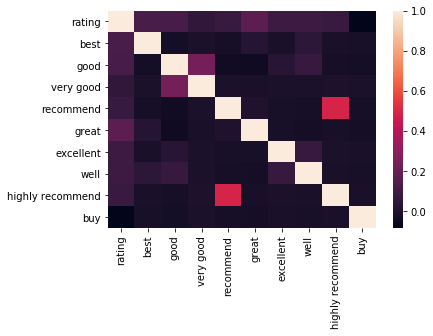

In [139]:
sns.heatmap(sms_raw.corr())

In [140]:
sms_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
review              1000 non-null object
rating              1000 non-null bool
best                1000 non-null bool
good                1000 non-null bool
very good           1000 non-null bool
recommend           1000 non-null bool
great               1000 non-null bool
excellent           1000 non-null bool
well                1000 non-null bool
highly recommend    1000 non-null bool
buy                 1000 non-null bool
dtypes: bool(10), object(1)
memory usage: 13.7+ KB


In [141]:
data = sms_raw[keywords]
target = sms_raw['rating']

In [142]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 404
